JORGE ADRIÁN CARO CASTILLO A01570425

Final Project "Madden Ratings"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import statsmodels.api as sm
import numpy as np
#from sklearn import linear_model

In [3]:
df = pd.read_csv('madden21_def_ratings.csv')
df.head()

,Team,Full Name,Overall Rating,Position,Age,Speed,Acceleration,Awareness,Agility,Strength,...,Jersey Number,Total Salary,Signing Bonus,Archetype,Running Style,Years Pro,Height,Weight,Birthdate,College
0,Rams,Aaron Donald,99,RE,29,82,90,99,86,99,...,99,"$101,892,000.00","$40,000,000.00",DE_PowerRusher,Default Stride Loose,6,73,280,5/23/1991,Pittsburgh
1,Patriots,Stephon Gilmore,99,CB,29,92,94,99,94,70,...,24,"$33,550,000.00","$31,450,000.00",CB_MantoMan,Default,8,73,202,9/19/1990,South Carolina
2,Texans,J.J. Watt,98,LE,31,77,83,99,85,97,...,99,"$87,970,000.00","$16,750,000.00",DE_RunStopper,Default,9,77,288,3/22/1989,Wisconsin
3,Seahawks,Bobby Wagner,98,MLB,30,86,89,96,85,81,...,54,"$42,000,000.00","$26,100,000.00",MLB_FieldGeneral,Default Stride Awkward,8,72,242,6/27/1990,Utah State
4,Bears,Khalil Mack,97,LOLB,29,86,89,98,87,89,...,52,"$107,050,000.00","$47,800,000.00",OLB_PowerRusher,Default Stride Loose,6,75,269,2/22/1991,Buffalo


In [4]:
df.shape

(1263, 69)

In [5]:
df.columns

Index(['Team', 'Full Name', 'Overall Rating', 'Position', 'Age', 'Speed',
       'Acceleration', 'Awareness', 'Agility', 'Strength', 'Throw Power',
       'Throw On The Run', 'Throw Under Pressure', 'Throw Accuracy Short',
       'Throw Accuracy Mid', 'Throw Accuracy Deep', 'Release',
       'Ball Carrier Vision', 'Stamina', 'Carrying', 'Play Action', 'Pursuit',
       'Play Recognition', 'Short Route Running', 'Medium Route Running',
       'Deep Route Running', 'Catch In Traffic', 'Catching', 'Spin Move',
       'Finesse Moves', 'Spectacular Catch', 'Jumping', 'Tackle',
       'Zone Coverage', 'Man Coverage', 'Trucking', 'Juke Move', 'Break Sack',
       'Toughness', 'Stiff Arm', 'Power Moves', 'Lead Blocking',
       'Run Block Power', 'Run Blocking', 'Hit Power', 'Pass Block Finesse',
       'Pass Block Power', 'Pass Blocking', 'Impact Blocking', 'Kick Return',
       'Kick Accuracy', 'Break Tackle', 'Kick Power', 'Change Of Direction',
       'Press', 'Block Shedding', 'Run Block 

## Correlación (variables numéricas)

In [6]:
vars = ['Overall Rating','Tackle','Zone Coverage','Man Coverage','Hit Power','Press','Run Block Power','Pass Block Power']

df = df[vars].dropna()

df[vars].corr()

,Overall Rating,Tackle,Zone Coverage,Man Coverage,Hit Power,Press,Run Block Power,Pass Block Power
Overall Rating,1.000000,0.246157,0.243405,0.209076,0.178772,0.131384,-0.067775,-0.058629
Tackle,0.246157,1.000000,0.342714,0.224779,0.906393,0.109185,-0.238107,-0.252530
Zone Coverage,0.243405,0.342714,1.000000,0.978049,0.430497,0.913749,-0.616938,-0.607643
Man Coverage,0.209076,0.224779,0.978049,1.000000,0.327889,0.949564,-0.589747,-0.579055
Hit Power,0.178772,0.906393,0.430497,0.327889,1.000000,0.230369,-0.274797,-0.289139
Press,0.131384,0.109185,0.913749,0.949564,0.230369,1.000000,-0.590738,-0.579252
Run Block Power,-0.067775,-0.238107,-0.616938,-0.589747,-0.274797,-0.590738,1.000000,0.984592
Pass Block Power,-0.058629,-0.252530,-0.607643,-0.579055,-0.289139,-0.579252,0.984592,1.000000


## Entrenamiento y prueba

In [7]:
X = pd.DataFrame(df[['Tackle','Zone Coverage','Man Coverage','Hit Power','Press','Run Block Power','Pass Block Power']]) #independiente
X = sm.add_constant(X)
Y = pd.DataFrame(df['Overall Rating']) #dependiente

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [9]:
X

,const,Tackle,Zone Coverage,Man Coverage,Hit Power,Press,Run Block Power,Pass Block Power
0,1.0,92,29,25,88,21,45,45
1,1.0,68,97,99,68,99,35,35
2,1.0,98,29,23,87,15,45,45
3,1.0,96,84,74,98,42,45,45
4,1.0,94,59,50,88,48,45,45
...,...,...,...,...,...,...,...,...
1258,1.0,35,12,12,20,10,57,58
1259,1.0,29,15,13,20,10,56,59
1260,1.0,27,16,12,30,10,57,57
1261,1.0,30,19,15,25,10,59,57


In [10]:
print(X_train.head())
print(X_train.shape)

      const  Tackle  Zone Coverage  Man Coverage  Hit Power  Press  \
541     1.0      82             27            23         82     16   
1151    1.0      75             25            18         78     13   
900     1.0      74             47            43         78     30   
570     1.0      58             66            70         74     79   
462     1.0      59             72            70         85     73   

      Run Block Power  Pass Block Power  
541                45                45  
1151               46                44  
900                45                45  
570                35                35  
462                35                35  
(884, 8)


In [11]:
print(X_test.head())
print(X_test.shape)

      const  Tackle  Zone Coverage  Man Coverage  Hit Power  Press  \
1207    1.0      51             62            58         55     71   
868     1.0      57             65            67         60     67   
532     1.0      80             59            53         84     41   
344     1.0      81             61            58         83     45   
405     1.0      83             55            53         77     45   

      Run Block Power  Pass Block Power  
1207               35                35  
868                35                35  
532                45                45  
344                44                44  
405                45                45  
(379, 8)


In [12]:
print(y_test.head())
print(y_test.shape)

      Overall Rating
1207              58
868               65
532               71
344               75
405               73
(379, 1)


## MODELO DE REGRESIÓN

### ESCENARIO 1

In [13]:
model = sm.OLS(y_train, X_train)
model = model.fit()

In [14]:
model

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     19.08
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           8.08e-24
Time:                        23:31:07   Log-Likelihood:                -3130.7
No. Observations:                 884   AIC:                             6277.
Df Residuals:                     876   BIC:                             6316.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               56.0345      2.086  

In [16]:
residual_values = model.resid #valores residuales
residual_values 

541      2.066519
1151    -7.197815
900     -6.471145
570      3.489069
462      5.208416
          ...    
1044    -8.092539
1095    -8.552539
1130   -10.240362
860     -5.646808
1126    -7.402630
Length: 884, dtype: float64

In [17]:
m1_pred = model.fittedvalues
m1_pred

541     68.933481
1151    67.197815
900     71.471145
570     66.510931
462     66.791584
          ...    
1044    70.092539
1095    69.552539
1130    70.240362
860     70.646808
1126    67.402630
Length: 884, dtype: float64

In [18]:
y_train.head(2)

,Overall Rating
541,71
1151,60


### Normalidad

<AxesSubplot:ylabel='Count'>

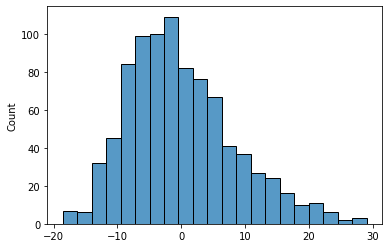

In [19]:
sns.histplot(model.resid)

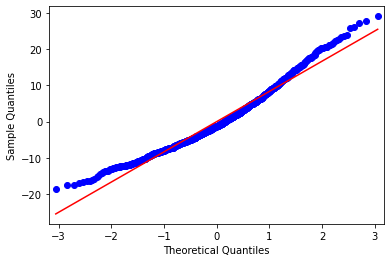

In [20]:
sm.qqplot(model.resid, line='s');

In [21]:
from scipy.stats import shapiro
shapiro(model.resid)
#no cumple con el requisito de normalidad

ShapiroResult(statistic=0.9699224829673767, pvalue=1.537869658008173e-12)

## Homogeneidad de varianza (valores ajustados vs. residuales)

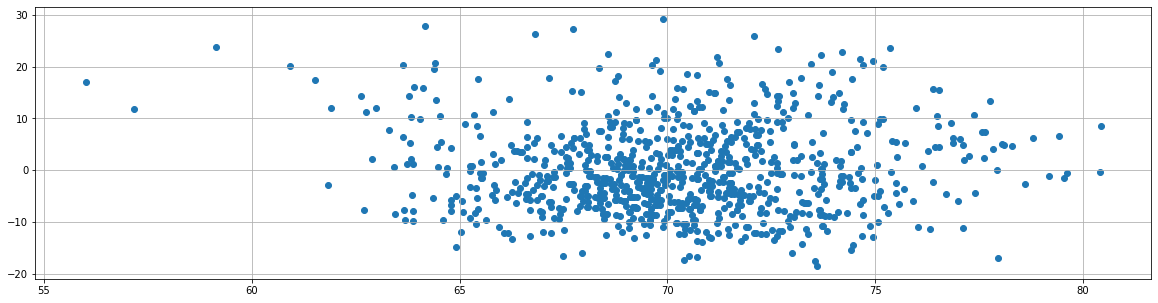

In [22]:
plt.figure(figsize=(20,5))
plt.scatter(x = model.fittedvalues, y = model.resid)
plt.grid(True)

### Independencia

In [23]:
model.resid

541      2.066519
1151    -7.197815
900     -6.471145
570      3.489069
462      5.208416
          ...    
1044    -8.092539
1095    -8.552539
1130   -10.240362
860     -5.646808
1126    -7.402630
Length: 884, dtype: float64

In [24]:
res = pd.DataFrame(model.resid).reset_index(drop=True)
res.head()

,0
0,2.066519
1,-7.197815
2,-6.471145
3,3.489069
4,5.208416


In [25]:
res = pd.DataFrame(model.resid).reset_index(drop=True)
res = res.rename(columns={0: 'residuales'})
res.head()

,residuales
0,2.066519
1,-7.197815
2,-6.471145
3,3.489069
4,5.208416


In [26]:
orden = pd.DataFrame(pd.Series(range(1,12622)))
orden = orden.rename(columns={0: 'orden'})
orden.head()

,orden
0,1
1,2
2,3
3,4
4,5


In [27]:
indep = pd.concat([orden, res], axis = 1)
indep.head()

,orden,residuales
0,1,2.066519
1,2,-7.197815
2,3,-6.471145
3,4,3.489069
4,5,5.208416


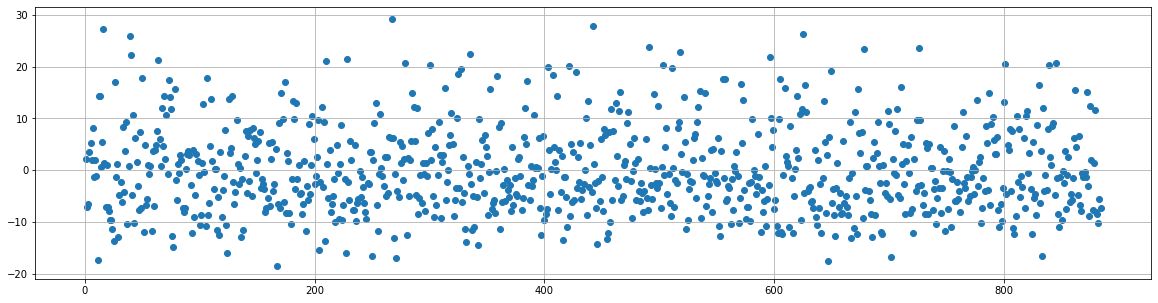

In [28]:
plt.figure(figsize=(20,5))
plt.scatter(x=indep['orden'], y=indep['residuales'])
plt.grid(True)
#Los valores son independientes entre si

## Predicción

In [29]:
model.predict(X_test)

1207    67.391886
868     70.055745
532     73.270349
344     73.880806
405     73.830871
          ...    
435     70.143930
5       70.804087
100     73.611714
849     71.005864
1205    70.144349
Length: 379, dtype: float64

In [30]:
pred1 = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)
pred1 = pred1.rename(columns={0: 'pred1'})
pred1.head()

,pred1
0,67.391886
1,70.055745
2,73.270349
3,73.880806
4,73.830871


In [31]:
pred1.shape

(379, 1)

In [32]:
y_test = y_test.reset_index(drop=True)
m1_resultados = pd.concat([y_test, pred1], axis = 1)
m1_resultados.head()

,Overall Rating,pred1
0,58,67.391886
1,65,70.055745
2,71,73.270349
3,75,73.880806
4,73,73.830871


In [33]:
y_test.head()

,Overall Rating
0,58
1,65
2,71
3,75
4,73


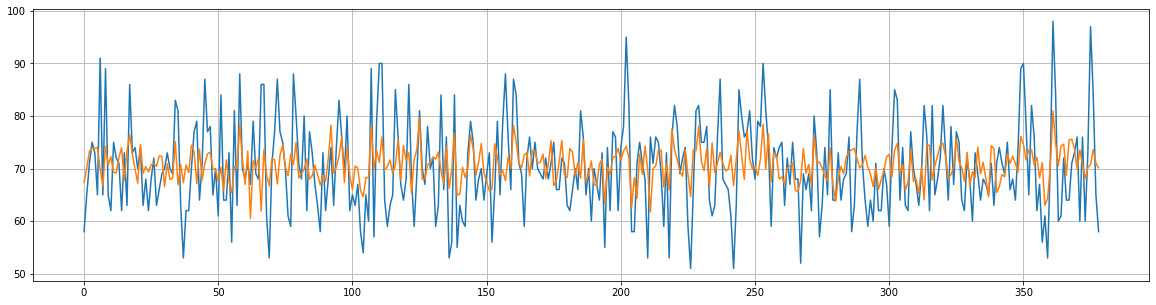

In [34]:
plt.figure(figsize=(20,5))
plt.plot(m1_resultados['Overall Rating']) #color azul
plt.plot(m1_resultados['pred1']) #color naranja
plt.grid(True)

In [35]:
m1_resultados = m1_resultados.head(20)

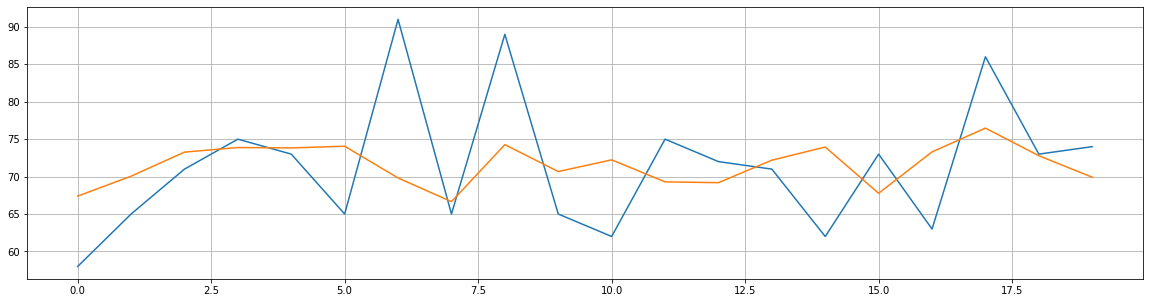

In [36]:
plt.figure(figsize=(20,5))
plt.plot(m1_resultados['Overall Rating']) #color azul
plt.plot(m1_resultados['pred1']) #color naranja
plt.grid(True)

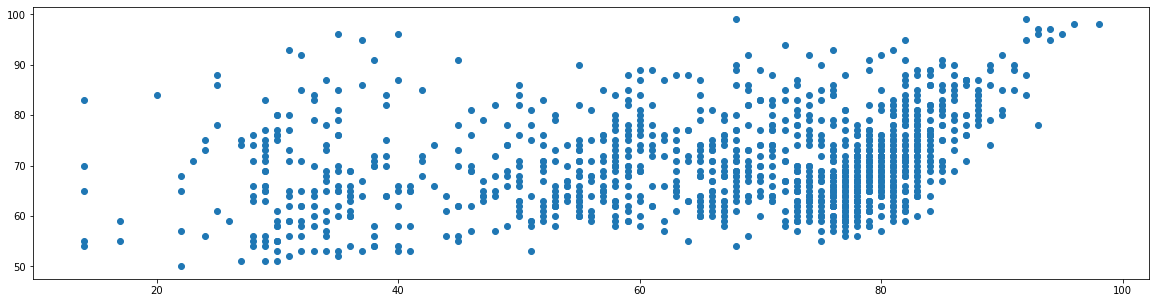

In [38]:
x=df['Tackle']
plt.figure(figsize=(20,5))
plt.scatter(x=df['Tackle'], y=df['Overall Rating'])

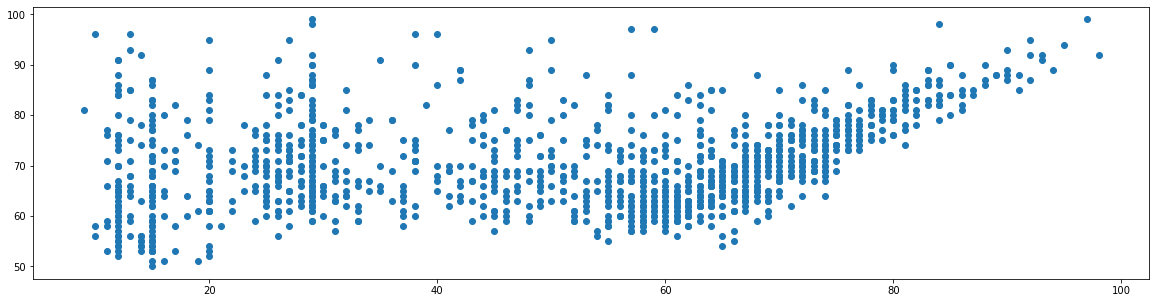

In [39]:
x=df['Zone Coverage']
plt.figure(figsize=(20,5))
plt.scatter(x=df['Zone Coverage'], y=df['Overall Rating'])

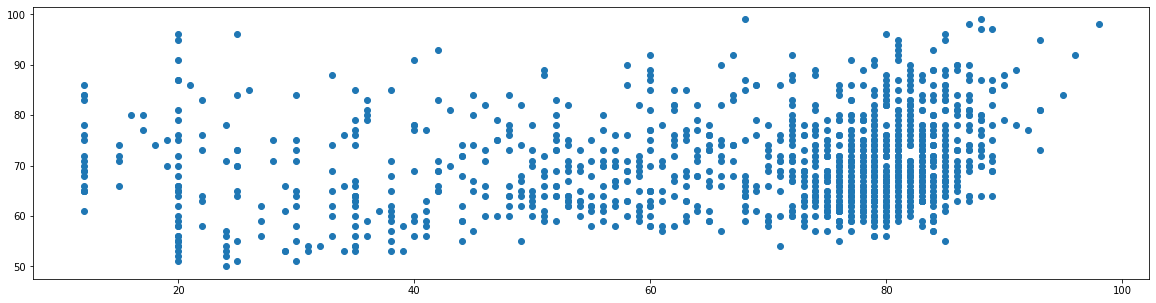

In [40]:
x=df['Hit Power']
plt.figure(figsize=(20,5))
plt.scatter(x=df['Hit Power'], y=df['Overall Rating'])

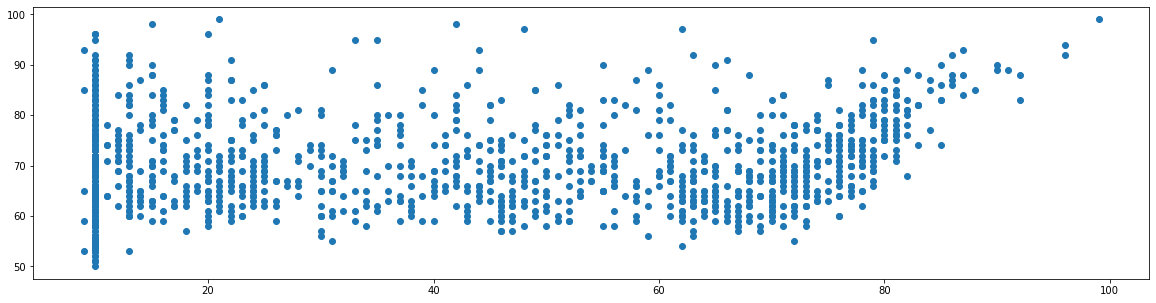

In [41]:
x=df['Press']
plt.figure(figsize=(20,5))
plt.scatter(x=df['Press'], y=df['Overall Rating'])

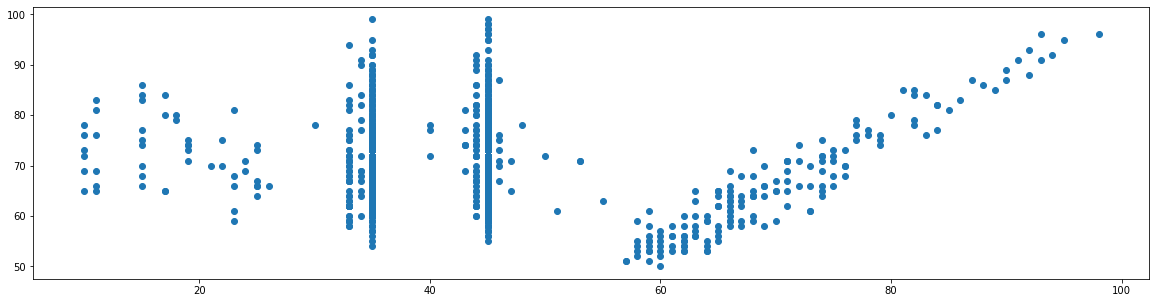

In [42]:
x=df['Pass Block Power']
plt.figure(figsize=(20,5))
plt.scatter(x=df['Pass Block Power'], y=df['Overall Rating'])